##### 2.1. Реализовать методы простой итерации и Ньютона решения нелинейных уравнений в виде программ, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения найти положительный корень нелинейного уравнения (начальное приближение определить графически). Проанализировать зависимость погрешности вычислений от количества итераций. 

Варинат 23

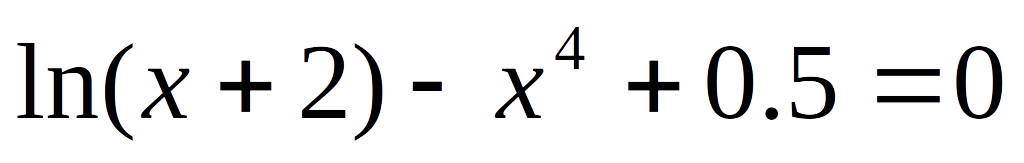

In [162]:
import math
import matplotlib.pyplot as plt


In [163]:
eps = 0.01

Определим отрезок, заметим что, ln(x+2) определён при x > -2

In [164]:
def frange(start, stop, step):
    while start < stop:
        yield start
        start += step

In [165]:
x = [i for i in frange(0.01, 2, 0.01)]

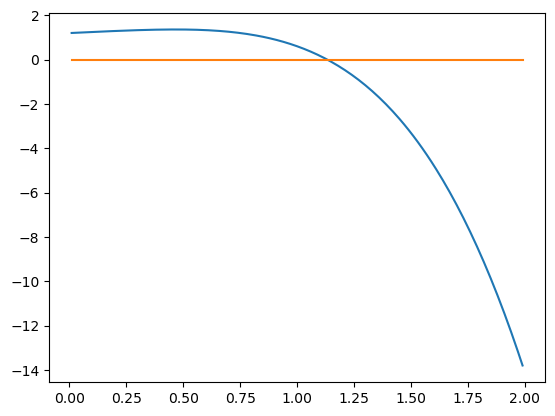

In [166]:
plt.plot(x, [(math.log(i + 2) - i**4 + 0.5) for i in x])
plt.plot(x, [0 for i in x])
plt.show()

X лежит на интервале (0.5, 1.25)

In [167]:
a, b = 0.5, 1.25

## Метод Ньютона

Выпишим функцию и её производные 

In [168]:
def f(x):
    return math.log(x + 2) - x**4 + 0.5 
def f1(x):
    return 1/(x + 2) - 4* x**3
def f11(x):
    return -1/(x + 2)**2 - 12 * x**2

Проверим условия:

1) $f(a) * f(b) < 0$

2) $f(x_0) f''(x_0) > 0$

In [169]:
def check_conditions_newton(f, f11, a, b, x_num):
    if f(a) * f(b) < 0 and f(x_num) * f11(x_num) > 0:
        return 1
    else:
        return 0

In [170]:
def Newton(X, eps, f, f11, a, b):
    if check_conditions_newton(f, f11, a, b, X):
        error = 10 * eps
        itera = 0
        while (error > eps):
            X_new = X - (f(X)/f1(X))
            error = abs(X_new - X)
            X = X_new
            itera += 1
        return X_new, itera
    else:
        print("Contitions are broken")


In [171]:
X_new, itera = Newton(b, eps, f, f11, a, b)

In [172]:
print(X_new, itera)

1.1319316687194723 3


In [173]:
f(X_new)

-1.0651621604740313e-06

## Метод простой итераций

In [174]:
def phi(x):
    return ((math.log(x + 2) + 0.5) ** (1/4)) 

def phi1(x):
    return 1 / (4 * x + 8) * (math.log(x + 2) + 0.5) ** (3/4)

проверим условия : 
1) ϕ(x) ∈ [a,b] ∀ x ∈ [a,b]
2) ∃ q : |ϕ′(x)| < q ∀ x ∈ [a,b]

In [175]:
def check_conditions_itera(a, b, phi, phi1):
    x = [i for i in frange(a, b, 0.01)]
    max([abs(phi1(i)) for i in x ])
    if max([phi(i) for i in x]) < b and min([phi(i) for i in x]) > a and  max([abs(phi1(i)) for i in x ]) < float("inf"):
        return 1
    else:
        return 0

In [176]:
def get_q(X_array, phi1):
    return max([abs(phi1(i)) for i in X_array ])


In [177]:
def Simple_iteration(X, eps, q, phi, phi1, a, b):
    if check_conditions_itera(a, b, phi, phi1):
        itera  = 0
        error = 10 * eps
        itera = 0
        while (error > eps):
            X_new = phi(X)
            error = q * abs(X_new - X) / (1 - q)
            itera += 1
            X = X_new
        return X, itera
    else:
        print("Contitions hasn't been passed")

In [178]:
x = [i for i in frange(a, b, 0.01)]

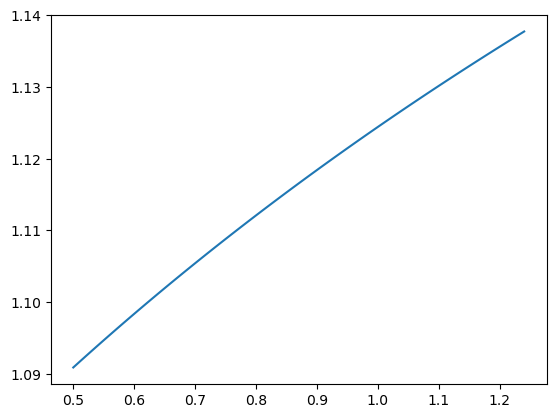

In [179]:
plt.plot (x, [phi(i) for i in x])
plt.show()

Условия выполнены

In [180]:
X_ans, itera = Simple_iteration((a+b)/2, eps, get_q(x, phi1), phi, phi1, a, b)

In [181]:
print(X_ans, itera)

1.1311000872276396 2


##### 2.2. Реализовать методы простой итерации и Ньютона решения систем нелинейных уравнений в виде программного кода, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения решить систему нелинейных уравнений (при наличии нескольких решений найти то из них, в котором значения неизвестных являются положительными); начальное приближение определить графически. Проанализировать зависимость погрешности вычислений от количества итераций. 

вариант 23

a = 2

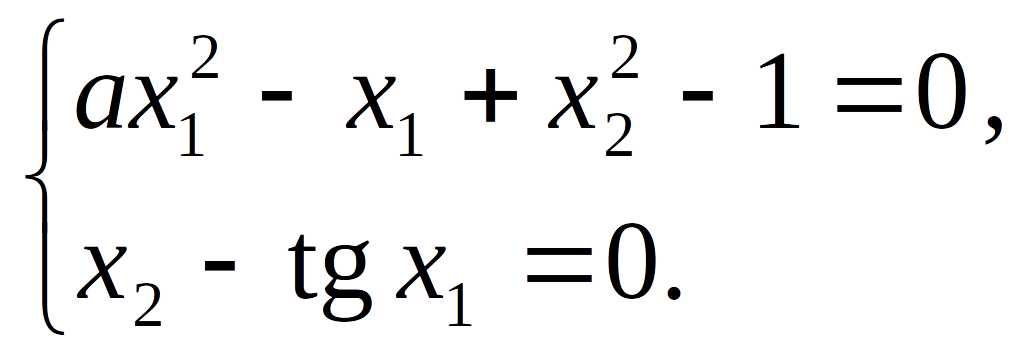

In [182]:
x_inter = [i for i in frange(-0.5, 1, 0.1)]

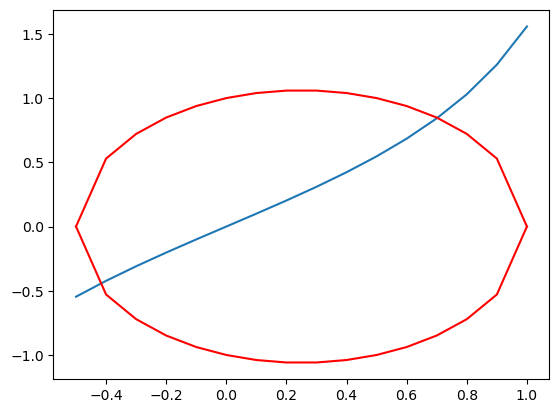

In [183]:
plt.plot(x_inter, [math.tan(i) for i in x_inter])
plt.plot(x_inter, [-1 * math.sqrt(-2 * i**2 + i + 1) for i in x_inter], color='red')
plt.plot(x_inter, [ math.sqrt(-2 * i**2 + i + 1) for i in x_inter], color='red')
plt.show()

In [184]:
y_min = min([-1 * math.sqrt(-2 * i**2 + i + 1) for i in x_inter])

In [185]:
y_max = max([ math.sqrt(-2 * i**2 + i + 1) for i in x_inter])

In [186]:
step_y = (y_max - y_min) / (len(x_inter)) 

In [187]:
step_y

0.13228756555322954

In [188]:
y_inter = [i for i in frange(y_min, y_max, step_y )]

In [189]:
def LU(A):
    n = len(A[0])
    U = [[0 for j in range(n)] for i in range(n)]
    L = [[0 for j in range(n)] for i in range(n)]

    for i in range(n):
        L[i][i] = 1
        for k in range(i, n):
            U[i][k] = A[i][k] - sum(L[i][j] * U[j][k] for j in range(i))
        for k in range(i+1, n):
            L[k][i] = (A[k][i] - sum(L[k][j] * U[j][i] for j in range(i))) / U[i][i]

    return L, U

In [190]:
def det(A):
    d = 1
    _, U = LU(A)
    for i in range(len(U)):
        d *= U[i][i] 
    return d

метод ньютона

In [191]:
def fsys(x, y):
    return [2 * x**2 - x + y**2 - 1, y - math.tan(x)]

In [192]:
def jac(x, y):
    return [
        [4*x - 1, 2*y],
        [-math.cos(x) ** 2, 1]
        ]

In [193]:
def Newton_sys(x, y, fsys, jac, eps):
    itera = 0
    error = 10 * eps
    while (error > eps):
        x_new = x - det(
            [[fsys(x, y)[0], jac(x, y)[0][1]], [fsys(x, y)[1], jac(x, y)[1][1]]]) / det(jac(x, y))
        y_new = y - det([
            [jac(x, y)[0][0], fsys(x, y)[0]], [jac(x, y)[1][0], fsys(x, y)[1]]]) / det(jac(x, y))
        error = max(abs(x_new - x), abs(y_new - y))
        x, y = x_new, y_new
        itera += 1
    return x_new, y_new, itera

In [194]:
x, y = .6, .5
x_ans, y_ans, itera = Newton_sys(x, y, fsys, jac, eps)


In [195]:
print(x_ans, y_ans, itera)

0.7055230753803232 0.8427346548787235 11


Метод простых итераций

$$ 2x^2 - x + y^2 -1 = 0 $$

$$ y = phi(x, y) = \sqrt{-x^2 +x + 1} $$

$$ y = phi(x, y) = -\sqrt{-x^2 +x + 1} $$

$$ x = phi(x, y) =  \frac{1 + \sqrt{1 + 8y^2}}{4} $$

$$ x = phi(x, y) =  \frac{1 - \sqrt{1 + 8y^2}}{4} $$

$$ y - \tg{x} = 0 $$

$$ y = phi(x, y) = \tg{x} $$

$$ x = phi(x, y) = \arctg{y} $$

In [196]:
def phi1x1(x, y):
    return (1 + math.sqrt(1 + 8 * y**2))/4
def phi1x2(x, y):
    return (1 - math.sqrt(1 + 8*y**2))/4
def phi1y1(x, y):
    return  math.sqrt(- 2*x**2 + x + 1)
def phi1y2(x, y):
    return -math.sqrt(- 2*x**2 + x + 1) 
def phi2x(x, y):
    return math.atan(y)
def phi2y(x, y):
    return math.tan(x)

In [197]:
def dphi1(x, y):
    return [0, 1/(y**2 + 1)]
def dphi2(x, y):
    return [(1- 4*x) / (2* math.sqrt(-2 * x**2 + x + 1)), 0] if (-2 * x**2 + x + 1) != 0 else [0, 0]

In [198]:
def get_q(x_inter, y_inter, dphi1, dphi2):
    return max([max(abs(dphi1(x, y)[0]) + abs(dphi1(x, y)[1]), abs(dphi2(x, y)[0]) + abs(dphi2(x, y)[1])) for x, y in zip(x_inter, y_inter)])

In [199]:
def Simple_iteration_sys(x, y, phi1, phi2, eps, x_inter, y_inter, dphi1, dphi2):
    itera = 0
    error = 10 * eps
    q = get_q(x_inter, y_inter, dphi1, dphi2)
    while(error > eps):
        x_new = phi1(x, y)
        y_new = phi2(x, y)
        error = q / (q - 1) * max(abs(x_new - x), abs(y_new - y))
        x, y = x_new, y_new
        itera += 1
    return x, y, itera

In [200]:
x, y = .6, .5
x_ans, y_ans, itera = Simple_iteration_sys(x, y, phi2x, phi1y1, eps, x_inter, y_inter, dphi1, dphi2)

In [201]:
print(x_ans, y_ans, itera)

0.7002413536684682 0.8396697217592376 16
